In [5]:
from pandas import Series,DataFrame
import pandas as pd
import numpy as np
import scipy.io
import codecs
import cv2
import matplotlib.pyplot as plt

In [6]:
def show_scatter(matrix):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(np.array(matrix[0, :]), np.array(matrix[1, :]))
    plt.show()

In [7]:
# 读入特征匹配点

# 1、读入特征点对数据

In [12]:
dat1 = pd.read_table(r"C:\Users\Tianh\\Desktop\sift_cat_data0.txt",header=None,delim_whitespace=True)
dat2 = pd.read_table(r"C:\Users\Tianh\\Desktop\sift_cat_data1.txt",header=None,delim_whitespace=True)


In [13]:
dat1 = np.array(dat1)
dat2 = np.array(dat2)
print(dat1[0:5])
print(dat2[0:5])

[[   24.72726059    26.6254673     27.05867386 ...,  1002.70898438
   1002.79168701  1003.00415039]
 [  544.94317627   550.99884033   595.99847412 ...,   418.51168823
    575.36682129   348.93530273]]
[[   29.66661453    29.90255547    34.88697815 ...,  1209.32226562
   1214.96008301  1218.93164062]
 [  541.8079834    547.5133667    537.89703369 ...,   509.24005127
    502.03466797   509.06546021]]


In [14]:
print(dat1.shape)
print(dat2.shape)

(2, 4090)
(2, 4090)


# 2、对特征点对的一些直观了解

In [15]:
dat1 = dat1.T
dat2 = dat2.T

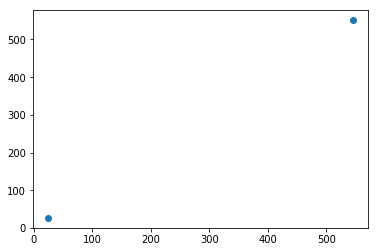

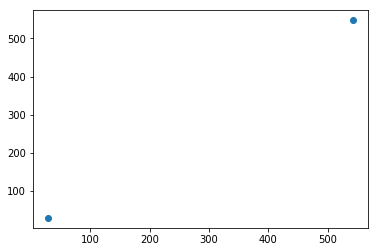

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022A87C0C668>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000022A87C54048>]], dtype=object)

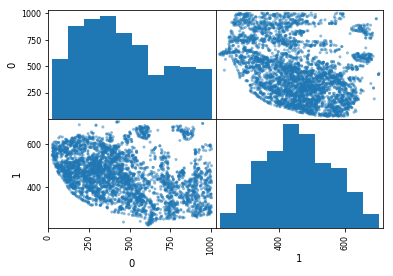

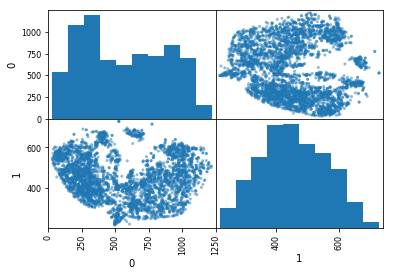

In [16]:
show_scatter(dat1)
show_scatter(dat2)
x1  =pd.DataFrame(dat1)
x2  =pd.DataFrame(dat2)
pd.plotting.scatter_matrix(x1)
pd.plotting.scatter_matrix(x2)
# print(x1)
# print(x2)

In [17]:
# 求解相机内参矩阵（已知）

# 3、读入相机内参矩阵（可省略）

In [18]:
cameraMatrix1 = np.array([[533.52231,0,341.60376],[0,533.52699,235.19287],[0,0,1]])
cameraMatrix2 = np.array([[536.91377,0,326.28657],[0,536.47649,250.10121],[0,0,1]])
# intrixMatrix = np.array(687.189819 0.000000 375.042664)
# 0.000000 641.376221 308.712708 
# 0.000000 0.000000 1.000000 
print(cameraMatrix1)
print(cameraMatrix2)

[[ 533.52231    0.       341.60376]
 [   0.       533.52699  235.19287]
 [   0.         0.         1.     ]]
[[ 536.91377    0.       326.28657]
 [   0.       536.47649  250.10121]
 [   0.         0.         1.     ]]


# 4、由特征点对数据计算本质矩阵

In [31]:
# 求解本质矩阵

In [20]:
# dat1 = dat1.T
# dat2 = dat2.T
E,mask = cv2.findEssentialMat(dat1,dat2)
# E,mask = cv2.findEssentialMat(dat1,dat2,)

# 问题应该处在本质矩阵的计算上 如何计算本质矩阵
# 用matlab昂方法计算 仍然不对

In [21]:
E_MAT = np.array([[0.0126,0.1049,0.0957],
    [0.0152,0.0117,0.9950],
                  [-0.1062,-0.9886,0.0235]])
E_MAT

array([[ 0.0126,  0.1049,  0.0957],
       [ 0.0152,  0.0117,  0.995 ],
       [-0.1062, -0.9886,  0.0235]])

In [22]:
# 求解相机外参矩阵

# 5、分解本质矩阵得到相机外参矩阵

In [23]:
R1,R2,t = cv2.decomposeEssentialMat(E)

In [25]:
print(R1)
print("----------")
print(R2)
print("----------")
print(t)

[[ -9.46211782e-01  -3.23547661e-01  -4.18230423e-04]
 [ -3.23546766e-01   9.46211053e-01  -1.46080073e-03]
 [  8.68372908e-04  -1.24690976e-03  -9.99998846e-01]]
----------
[[  9.56587407e-01   2.91445220e-01   4.64368134e-04]
 [ -2.91444449e-01   9.56586907e-01  -1.27390540e-03]
 [ -8.15482118e-04   1.08326435e-03   9.99999081e-01]]
----------
[[  1.68687764e-02]
 [ -9.99857708e-01]
 [  8.59902763e-05]]


In [28]:
np.savetxt(r"C:\Users\Tianh\Desktop\R_Matrix",R1)
np.savetxt(r"C:\Users\Tianh\Desktop\t_Matrix",t)

In [44]:
# rot2euler = cv2.rotationMatrixToEulerAngles(R1)

In [24]:
print(R1.shape)
# R1_r, _ = cv2.Rodrigues(R1)
# R2_r, _ = cv2.Rodrigues(R2)
print("------")
# print(R1_r.shape)
print(t.shape)
print("------")
waican1 = np.hstack((R1,t))
waican2 = np.hstack((R2,t))
print(waican1.shape)
print(waican1)
test_mat = np.array([[1,2,3,9],[2,3,4,10],[5,6,7,11]])

(3, 3)
------
(3, 1)
------
(3, 4)
[[ 0.99273198 -0.00842389 -0.12005103 -0.99437637]
 [ 0.00693397  0.99989374 -0.01282303  0.02721718]
 [ 0.12014629  0.0118974   0.9926849  -0.10234679]]


In [25]:
print(R1)
print('--------')
print(t)

[[ 0.99273198 -0.00842389 -0.12005103]
 [ 0.00693397  0.99989374 -0.01282303]
 [ 0.12014629  0.0118974   0.9926849 ]]
--------
[[-0.99437637]
 [ 0.02721718]
 [-0.10234679]]


# 6、计算相机矩阵

In [26]:
# 求解相机矩阵

In [27]:
KK1 = np.dot(cameraMatrix1,waican1)
KK2  =np.dot(cameraMatrix2,waican1)
print(KK1)
print(KK2)

[[ 5.70687085e+02 -4.30133734e-01  2.75054994e+02 -5.65484026e+02]
 [ 3.19570114e+01  5.36268482e+02  2.26630978e+02 -9.55013468e+00]
 [ 1.20146291e-01  1.18974048e-02  9.92684905e-01 -1.02346795e-01]]
[[ 5.72213593e+02 -6.40937821e-01  2.59442703e+02 -5.67288748e+02]
 [ 3.37686449e+01  5.39395039e+02  2.41392440e+02 -1.09956784e+01]
 [ 1.20146291e-01  1.18974048e-02  9.92684905e-01 -1.02346795e-01]]


# 7、三维重建

In [49]:
# 计算特征匹配点的三维重构坐标

In [66]:
# 将特征匹配点矩阵转置为triangulate函数所需的数据格式
dat1 = dat1.T
dat2 = dat2.T
print(dat1.shape)
print(dat2.shape)

(2, 54)
(2, 54)


In [68]:
np.savetxt("C:\\Users\\Tianh\\Desktop\\left01.txt",dat1)
np.savetxt("C:\\Users\\Tianh\\Desktop\\right01.txt",dat2)

In [51]:
# print(dat1[:,0:5])
# print(dat2[:,0:5])
print(dat1.dtype)

float64


In [53]:
# print(dat1[0])
# print(dat2[0])
# print(dat1[1])
# print(dat2[1])
x1 = cv2.triangulatePoints(KK1,KK2,dat1,dat2)
# x2 = cv2.triangulatePoints(KK1,KK2,dat1[1],dat2[1])
# 无论输入怎样的特征点他都是返回一样的结果
# 无论输入怎样的相机矩阵也是返回一样的结果
# 输入参数为KK1  KK1  dat1 dat1 则返回的结果有利有据
# 改变了一个外参矩阵发现
print(x1)
print("-----")

[[ 0.70296904  0.70296904  0.70296904  0.70296904  0.70296904  0.70296904
   0.70296904  0.70296904  0.70296904  0.70296904  0.70296904  0.70296904
   0.70296904  0.70296904  0.70296904  0.70296904  0.70296904  0.70296904
   0.70296904  0.70296904  0.70296904  0.70296904  0.70296904  0.70296904
   0.70296904  0.70296904  0.70296904  0.70296904  0.70296904  0.70296904
   0.70296904  0.70296904  0.70296904 -0.70296904 -0.70296904 -0.70296904
   0.70296904  0.70296904 -0.70296904 -0.70296904 -0.70296904 -0.70296904
  -0.70296904 -0.70296904 -0.70296904 -0.70296904 -0.70296904 -0.70296904
  -0.70296904 -0.70296904 -0.70296904 -0.70296904 -0.70296904 -0.70296904]
 [-0.07574697 -0.07574697 -0.07574697 -0.07574697 -0.07574697 -0.07574697
  -0.07574697 -0.07574697 -0.07574697 -0.07574697 -0.07574697 -0.07574697
  -0.07574697 -0.07574697 -0.07574697 -0.07574697 -0.07574697 -0.07574697
  -0.07574697 -0.07574697 -0.07574697 -0.07574697 -0.07574697 -0.07574697
  -0.07574697 -0.07574697 -0.07574697

In [40]:
print(dat1[0])
print(dat2[0])

[380.81331667  93.13386631]
[513.79044933  86.54790059]


In [41]:
dat1

array([[380.81331667,  93.13386631],
       [381.29796162, 130.61585812],
       [381.52143975, 168.38482033],
       [381.70293948, 206.14067069],
       [381.59085295, 243.3333634 ],
       [381.4323714 , 279.42095735],
       [344.06215902,  94.21895408],
       [344.6729803 , 131.35614004],
       [345.0883739 , 168.43636964],
       [345.33373481, 205.4640249 ],
       [345.64619956, 241.98587676],
       [346.06637168, 277.72440884],
       [308.54724428,  96.11230515],
       [308.95027867, 132.26705757],
       [309.38649974, 168.58030183],
       [310.21692218, 205.15155913],
       [310.70607143, 240.86835219],
       [311.34375236, 275.80338468],
       [274.37131575,  98.09467646],
       [274.79571444, 133.61434034],
       [275.3668314 , 169.23595934],
       [276.37457587, 204.55036259],
       [277.30895498, 240.0161307 ],
       [278.38753997, 274.14163835],
       [241.52856133, 100.07507781],
       [242.42560699, 134.77749525],
       [243.22631879, 169.96827578],
 

In [42]:
dat2

array([[513.79044933,  86.54790059],
       [514.23939297, 122.7932514 ],
       [513.87367115, 159.38250866],
       [513.1276554 , 195.57403241],
       [511.82046637, 231.55687337],
       [510.37636022, 266.22779697],
       [477.6332651 ,  86.29800242],
       [478.01649273, 122.20241709],
       [477.82786471, 158.3644067 ],
       [477.42704481, 194.34569183],
       [476.70789473, 230.05845797],
       [475.3161677 , 264.65586004],
       [441.62061867,  86.31917451],
       [442.10410149, 122.08410547],
       [442.07935791, 157.81415204],
       [441.73431801, 193.64942533],
       [441.27162922, 228.59287155],
       [440.495858  , 263.22314317],
       [406.47406118,  86.77981952],
       [406.62925007, 122.18904953],
       [406.7909153 , 157.51786126],
       [406.72001993, 192.44947732],
       [406.60134937, 227.61540452],
       [406.18993448, 261.65593153],
       [371.66856516,  87.91421864],
       [372.18226315, 122.2279093 ],
       [372.40077981, 157.40350572],
 

In [300]:
KK1

array([[ 5.70507511e+02, -2.04719281e+00,  2.75419994e+02,
         5.63553710e+02],
       [ 3.31013881e+01,  5.35988935e+02,  2.27127486e+02,
        -2.76710402e+01],
       [ 1.19536569e-01,  1.07283433e-02,  9.92771832e-01,
         1.03865410e-01]])

In [301]:
KK2

array([[ 5.72043540e+02, -2.24783078e+00,  2.59808503e+02,
         5.65319603e+02],
       [ 3.49110509e+01,  5.39098038e+02,  2.41892876e+02,
        -2.64106010e+01],
       [ 1.19536569e-01,  1.07283433e-02,  9.92771832e-01,
         1.03865410e-01]])

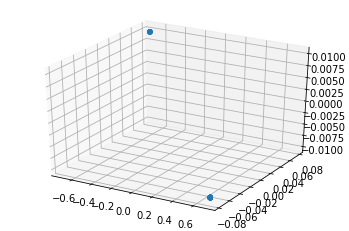

In [302]:
ax = plt.subplot(111, projection='3d')
x = np.array(x1)
y = np.array(x2)
z = np.array(x3)
ax.scatter(x,y,z,)

plt.show()

In [296]:
dat1[0,:]

array([380.81331667, 381.29796162, 381.52143975, 381.70293948,
       381.59085295, 381.4323714 , 344.06215902, 344.6729803 ,
       345.0883739 , 345.33373481, 345.64619956, 346.06637168,
       308.54724428, 308.95027867, 309.38649974, 310.21692218,
       310.70607143, 311.34375236, 274.37131575, 274.79571444,
       275.3668314 , 276.37457587, 277.30895498, 278.38753997,
       241.52856133, 242.42560699, 243.22631879, 244.11584111,
       245.32477335, 246.84350064, 211.02566869, 211.3233334 ,
       212.45033701, 213.41973904, 215.08242579, 216.95149386,
       181.37184108, 182.23031405, 183.16467072, 184.70641207,
       186.27271814, 188.14977673, 153.81598527, 154.57281611,
       155.42444426, 157.08472911, 158.94150073, 161.06209318,
       127.90201324, 128.85664192, 129.83456448, 131.18461648,
       133.29183389, 135.52366829])

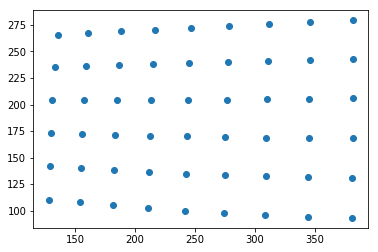

In [283]:
ax1 = plt.subplot(111)
ax1.scatter(np.array(dat1[0,:]),np.array(dat1[1,:]))